In [1]:
import numpy as np
import scipy.linalg as la
import sympy as sy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

## Problem 1

Use the `FuncAnimation` class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds. (Hint: Each frame of the animation will be a plot of $sin(x + 0.1t_i)$, where $t_i$ is the $i$th value of time for some array of time values).

<IPython.core.display.Javascript object>


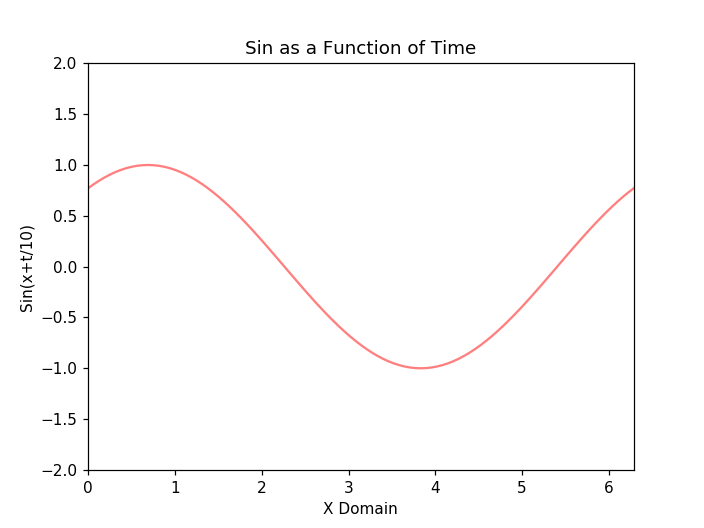

In [3]:
x= np.reshape(np.linspace(0,2*np.pi,101), (1,101))                              #create a domain
t = np.reshape(np.linspace(0,np.pi*60,101), (101,1))
y = np.sin(x+.1*t)
fig = plt.figure()
ax = fig.add_subplot(111)                                                       #create a figure and add a subplot
ax.set_xlim((0,2*np.pi))
ax.set_ylim(-2,2)
ax.set_title('Sin as a Function of Time')
ax.set_xlabel('X Domain')
ax.set_ylabel('Sin(x+t/10)')                                                    #Add titles and labels
traj, = plt.plot([],[], color='r',alpha=.5)
def update(i):
    traj.set_data(x,y[i])                                                      #Create update of each time step
    return(traj)
ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)
plt.show()
return

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


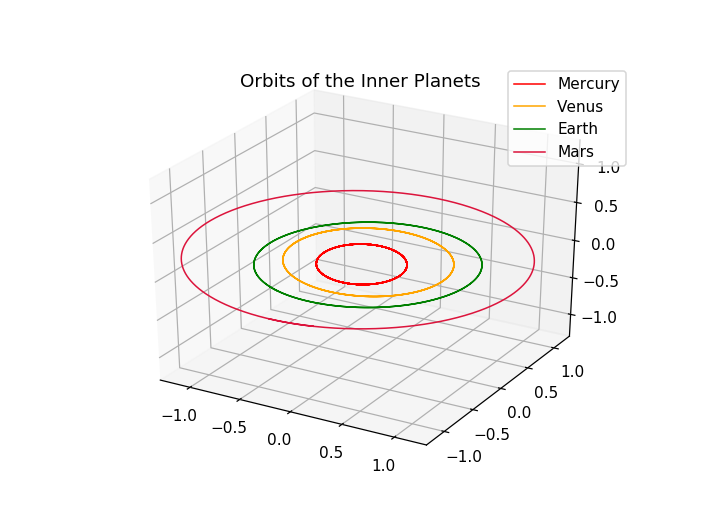

(-1.25, 1.25)

In [4]:
data = np.load('orbits.npz')                                        #Load all the data and split it by planet
mercury = data['mercury']
venus = data['venus']
earth = data['earth']
mars = data['mars']

fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')
ax.plot(mercury[:,0],mercury[:,1],mercury[:,2], color='r', linewidth=1, label='Mercury')  #Plot each orbit
ax.plot(venus[:,0],venus[:,1],venus[:,2], color='orange',linewidth=1, label='Venus')
ax.plot(earth[:,0],earth[:,1],earth[:,2], color='green',linewidth=1, label='Earth')
ax.plot(mars[:,0],mars[:,1],mars[:,2], color='crimson', linewidth=1,label='Mars')
ax.set_title('Orbits of the Inner Planets')
ax.legend()
ax.set_ylim(-1.25,1.25)
ax.set_xlim(-1.25,1.25)
ax.set_zlim(-1.25,1.25)


## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4".

To display the mp4 video in the Jupyter Notebook, run the following code in a markdown cell:

`<video src="planet_ani.mp4" controls>`

In [5]:
#Use this specific video player
animation.writer = animation.writers['ffmpeg']                              
plt.ioff()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

#Set the axis limits and title
ax.set_ylim(-1.25,1.25)
ax.set_xlim(-1.25,1.25)                                                      
ax.set_zlim(-1.25,1.25)
ax.set_title('Orbits of the Inner Planets')


#Plot each planets current position and its trajectory
merc_particle, = plt.plot([],[],[],marker='o', color='r', label = 'Mercury')
merc_traj, = plt.plot([],[],[], color='r',alpha=.5) 
venus_particle, = plt.plot([],[],[], marker='o', color='orange', label = 'Venus')
venus_traj, = plt.plot([],[],[], color='orange',alpha=.5)
earth_particle, = plt.plot([],[],[],marker='o', color='green', label = 'Earth')
earth_traj, = plt.plot([],[],[], color='green',alpha=.5)
mars_particle, = plt.plot([],[],[],marker='o', color='crimson', label = 'Mars')
mars_traj, = plt.plot([],[],[], color='crimson',alpha=.5)

ax.legend()

#Update each particle and trajectory with the data in the planet
def update(i):
    merc_particle.set_data(mercury[i,0],mercury[i,1])
    merc_particle.set_3d_properties(mercury[i,2])
    merc_traj.set_data(mercury[:i+1,0],mercury[:i+1,1])
    merc_traj.set_3d_properties(mercury[:i+1,2])
    
    venus_particle.set_data(venus[i,0],venus[i,1])
    venus_particle.set_3d_properties(venus[i,2])
    venus_traj.set_data(venus[:i+1,0],venus[:i+1,1])
    venus_traj.set_3d_properties(venus[:i+1,2])
    
    earth_particle.set_data(earth[i,0],earth[i,1])
    earth_particle.set_3d_properties(earth[i,2])
    earth_traj.set_data(earth[:i+1,0],earth[:i+1,1])
    earth_traj.set_3d_properties(earth[:i+1,2])
    
    mars_particle.set_data(mars[i,0],mars[i,1])
    mars_particle.set_3d_properties(mars[i,2])
    mars_traj.set_data(mars[:i+1,0],mars[:i+1,1])
    mars_traj.set_3d_properties(mars[:i+1,2])

#Return each of the particles and their trajectories
    
    return(merc_particle, venus_particle, earth_particle, mars_particle, 
           merc_traj, venus_traj, earth_traj, mars_traj)

ani = animation.FuncAnimation(fig,update,frames=range(len(mercury[:,0])), interval=25)

#Save the animation
ani.save('planet_ani.mp4')

<video src="planet_ani.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}\exp(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu}))$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

(Hint: Rewrite $f$ as a function of $x$ and $y$, expanding the matrix-vector products inside the exponential. Then evaluate your function on the meshgrid corresponding to $(x,y) \in [-5,5] \times [-5,5]$).

<IPython.core.display.Javascript object>


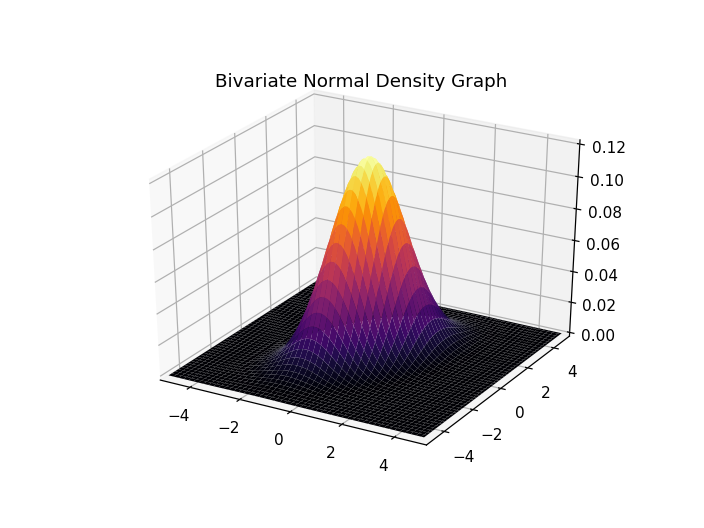

In [7]:
#Create an X and Y domain from -5 to 5
x= np.linspace(-5,5,100)                                          
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

#Create a 3d array of the x and y values to use in the equation
A = np.dstack((X,Y))
e = np.array([[1,3/5],[3/5,2]])
e_det = la.det(2*np.pi*e)
e_inv = la.inv(e)
Z = np.ones_like(X)

#Use the given function to calculate each individual Z value
for i in range(100):
    for j in range(100):
        Z[i,j] = (1/e_det**(1/2))*np.exp(-1/2*np.reshape((A[i,j,:]),(1,2)).dot(e_inv).dot(np.reshape((A[i,j,:]),(2,1))))
fig = plt.figure()

#Set the axis limits and title
ax = fig.add_subplot(111,projection='3d')
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,.12)
ax.set_title('Bivariate Normal Density Graph')
ax.plot_surface(X,Y,Z,cmap='inferno')
plt.show()

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. Save the animation as `vibration.mp4`. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

In [11]:
animation.writer = animation.writers['ffmpeg']
plt.ioff()

#Get the data and split it
data = np.load('vibration.npz')
X,Y,Z = data['X'], data['Y'], data['Z']
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

#Update the animation by clearing the surface and resetting the axis limits
def update(i):
    ax.clear()
    ax.plot_surface(X,Y,Z[i],cmap='inferno')
    ax.set_ylim(0,3)
    ax.set_xlim(0,2)
    ax.set_zlim(-5,5)
    ax.set_title('Vibration Animation')
    return

#Save the animation 
ani = animation.FuncAnimation(fig, update, frames=range(150), interval=25)
ani.save('wavy.mp4')

<video src="wavy.mp4" controls>